In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Final/CTG_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


                    Open          High           Low         Close  \
Date                                                                 
2014-01-27  11717.867188  11856.540039  11648.531250  11717.867188   
2014-02-06  11648.531250  11717.867188  11509.858398  11648.531250   
2014-02-07  11579.194336  11717.867188  11509.858398  11579.194336   
2014-02-10  11509.858398  11648.531250  11440.521484  11509.858398   
2014-02-11  11579.194336  11717.867188  11440.521484  11509.858398   

               Adj Close     Volume  
Date                                 
2014-01-27  11717.867188   608510.0  
2014-02-06  11648.531250  1140509.0  
2014-02-07  11579.194336   826750.0  
2014-02-10  11509.858398  1639712.0  
2014-02-11  11509.858398  2082063.0  


In [ ]:
# 2. chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']]  # Biến phụ thuộc theo mảng 2 chiều

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 57280.191837331025


In [ ]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([23084.83275786, 23866.29314252, 23964.47168906, 24541.72492984,
       24596.87184934, 25381.87233549, 25570.57915913, 25570.57915913,
       25570.57915913, 25570.57915913, 25570.57915913, 25570.57915913,
       25570.57915913, 25570.57915913, 25570.57915913, 24845.63569833,
       25338.12554896, 25570.57915913, 25500.07461461, 24944.37046488,
       23843.05563579, 21506.44364344, 22036.89116292, 22221.32579982,
       23391.20724824, 23488.69607855, 23901.76237851, 24639.27453364,
       24229.38435936, 24203.81602605, 24944.59371838, 25353.54299536,
       25392.52166341, 25570.57915913, 25470.50267303, 25570.57915913,
       25381.87233549, 25368.94147722, 25570.57915913, 25570.57915913,
       25570.57915913, 25570.57915913, 25570.57915913, 25570.57915913,
       25381.87233549, 25381.87233549, 25570.57915913, 25570.57915913,
       25570.57915913, 25570.57915913, 25570.57915913, 25570.57915913,
       25570.57915913, 25570.57915913, 25570.57915913, 25570.57915913,
      

In [ ]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1, 1)
last_data

array([[26750.]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([25570.57915913]),
 array([25224.65297746]),
 array([24846.560184]),
 array([24635.31366573]),
 array([24416.949441]),
 array([23686.97335746]),
 array([23374.57410105]),
 array([22402.45281239]),
 array([22245.72312172]),
 array([22150.67269131]),
 array([21506.44364344]),
 array([21202.46928185]),
 array([20713.36622516]),
 array([20177.24154937]),
 array([19396.86623664]),
 array([19084.3480759]),
 array([18707.36061357]),
 array([18446.30022225]),
 array([18107.28923249]),
 array([17962.25075216]),
 array([17669.05687504]),
 array([17315.58699016]),
 array([17039.65586738]),
 array([16559.45324207]),
 array([16275.01344082]),
 array([15955.13818864]),
 array([15631.04349641]),
 array([15337.31275166]),
 array([15248.80903443]),
 array([15163.58815805])]

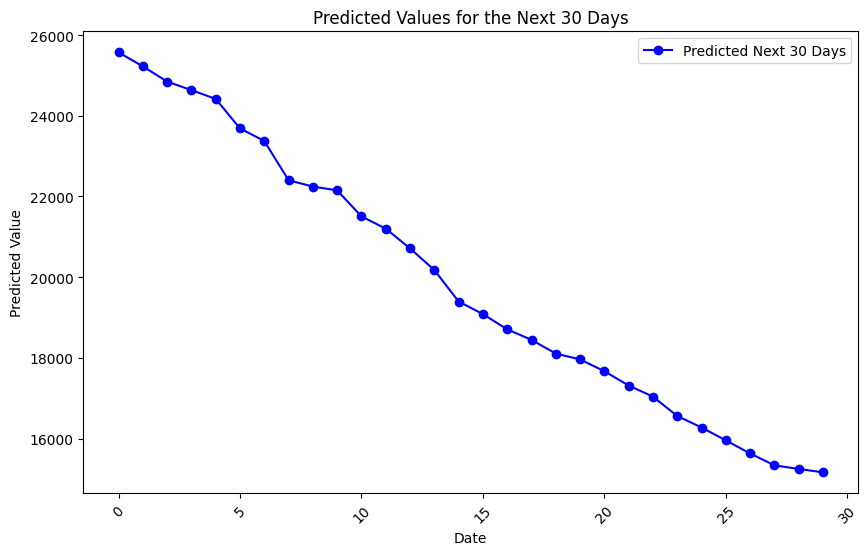

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [ ]:
# 7. Đánh giá độ chính xác test bằng RMSE, MSLE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
# MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)

Testing RMSE: Close    3374.857366
dtype: float64
Testing MAPE: 0.07270604774323569
Testing MSLE: 0.013640636501392038


In [ ]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

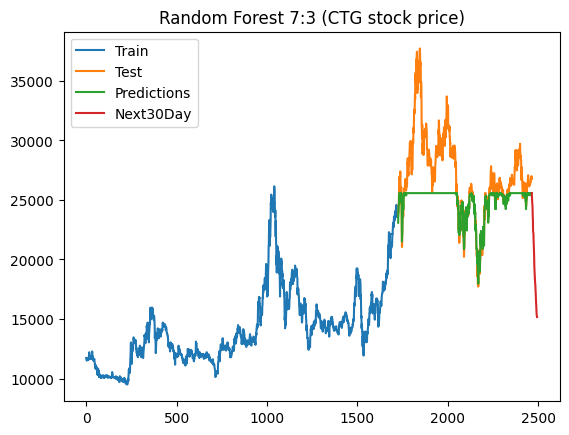

In [ ]:
# 9.Vẽ hình
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.title('Random Forest 7:3 (CTG stock price)')
plt.show()